<a href="https://colab.research.google.com/github/manognapalla/Data-Science-Methods/blob/master/ML_Data_Cleaning_and_Feature_Selection_Automobile_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INFO6105: Data Science Engineering Methods

# Assignment 1

*ML Data Cleaning and Feature Selection*

In this assignment, you will use a dataset for predictive learning and check the quality of the data and determine which features are important.

# Aim
Answer the following questions:

* What are the data types? (Only numeric and categorical)

* Are there missing values?

* What are the likely distributions of the numeric variables?

* Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

* Which independent variables have missing data? How much?

* Do the training and test sets have the same data?

* In the predictor variables independent of all the other predictor variables?

* Which predictor variables are the most important?

* Do the ranges of the predictor variables make sense?

* What are the distributions of the predictor variables?   

* Remove outliers and keep outliers (does if have an effect of the final predictive model)?

* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.






#Abstract

The Dataset: https://archive.ics.uci.edu/dataset/10/automobile

The Automobile Dataset offers insights into the characteristics of automobiles and their pricing. This dataset encompasses a range of attributes related to automobiles, including details about their make, model, fuel type, engine specifications, and more. The primary focus of analysis within this dataset is predicting the price of automobiles based on the available features.


1. **Data Preprocessing:** Initial data preparation steps are undertaken, including addressing missing data, encoding categorical variables, and standardizing or normalizing numeric features. Data preprocessing ensures that the dataset is in an optimal format for modeling.

2. **Feature Selection:** Determining which features are most influential in predicting 'price' and selecting the relevant attributes for the model-building process.

3. **Model Selection:** Choosing an appropriate regression model is a key decision. Options include linear regression, decision tree regression, random forest regression, and others.

4. **Model Training:** The selected regression model is trained using the training dataset, where it learns the relationships between the features and the target variable ('price').

5. **Model Evaluation:** The performance of the trained model is assessed through regression evaluation metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE).

6. **Prediction:** The trained model is applied to new or unseen data to generate predictions regarding the 'price' of automobiles.

7. **Analysis:** The results are analyzed to gain insights into the factors that significantly influence automobile pricing, shedding light on the relationships between various attributes and 'price.'




In [ ]:
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
automobile = fetch_ucirepo(id=10)

# data (as pandas dataframes)
X = automobile.data.features
y = automobile.data.targets

# metadata
print(automobile.metadata)

# variable information
print(automobile.variables)





{'uci_id': 10, 'name': 'Automobile', 'repository_url': 'https://archive.ics.uci.edu/dataset/10/automobile', 'data_url': 'https://archive.ics.uci.edu/static/public/10/data.csv', 'abstract': "From 1985 Ward's Automotive Yearbook", 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 205, 'num_features': 25, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['symboling'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1985, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5B01C', 'creators': ['Jeffrey Schlimmer'], 'intro_paper': None, 'additional_info': {'summary': 'This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars.  The second rating corresponds to the degree to which th

In [ ]:
#all necessary imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

In [ ]:
# Importing the necessary libraries
import pandas as pd

# Reading the automobile dataset
from ucimlrepo import fetch_ucirepo

# Fetching dataset
automobile = fetch_ucirepo(id=10)

# Creating a DataFrame from the dataset
df = pd.DataFrame(data=automobile.data.features, columns=automobile.data.feature_names)

# Display the first few rows of the DataFrame
df.head()


,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,171.2,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,176.6,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,176.6,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0




#What are the data types in the below dataset?


In [ ]:
# Checking the data types of each column
data_types = df.dtypes

# Printing the data types
print(data_types)

price                float64
highway-mpg            int64
city-mpg               int64
peak-rpm             float64
horsepower           float64
compression-ratio    float64
stroke               float64
bore                 float64
fuel-system           object
engine-size            int64
num-of-cylinders       int64
engine-type           object
curb-weight            int64
height               float64
width                float64
length               float64
wheel-base           float64
engine-location       object
drive-wheels          object
body-style            object
num-of-doors         float64
aspiration            object
fuel-type             object
make                  object
normalized-losses    float64
dtype: object


From the above result we understand that there are mainly 2 types of data:

1. Numeric Data Type

float64: These are floating-point numbers and represent continuous numerical data. Examples in the automobile dataset include price, peak-rpm, horsepower, compression-ratio, stroke, bore, height, width, length, wheel-base, and normalized-losses.

int64: These are integer numbers and represent discrete numerical data. Examples in the dataset highway-mpg, city-mpg, engine-size, num-of-cylinders, curb-weight, and num-of-doors.

2. Categorical Data Types

object: These are categorical variables and represent non-numeric, discrete categories or labels. Examples include fuel-system, engine-type, engine-location, drive-wheels, body-style, aspiration, fuel-type, and make.




# Are there missing values?

In [ ]:
# Checking for missing values in the entire DataFrame
total_missing = df.isna().sum().sum()

# Display columns with missing values and their counts

missing_values = df.isna().sum()

print(missing_values)

# Print the total count of missing values in the entire DataFrame
print("Total missing values:", total_missing)


price                 4
highway-mpg           0
city-mpg              0
peak-rpm              2
horsepower            2
compression-ratio     0
stroke                4
bore                  4
fuel-system           0
engine-size           0
num-of-cylinders      0
engine-type           0
curb-weight           0
height                0
width                 0
length                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
num-of-doors          2
aspiration            0
fuel-type             0
make                  0
normalized-losses    41
dtype: int64
Total missing values: 59


In [ ]:
import pandas as pd

# Loading dataset into a Pandas DataFrame
# df = pd.read_csv('your_dataset.csv')

# Remove rows with missing values (NaN) in any column
df_cleaned = df.dropna()


# df_cleaned = df.dropna(axis=1)



# Reset the index of the cleaned DataFrame (optional)
df_cleaned.reset_index(drop=True, inplace=True)

# Now, 'df_cleaned' contains the dataset with missing values removed


In [ ]:
# Check for missing values in the cleaned DataFrame
missing_values_cleaned = df_cleaned.isna().sum()

# Display columns with missing values and their counts
print(missing_values_cleaned)


price                0
highway-mpg          0
city-mpg             0
peak-rpm             0
horsepower           0
compression-ratio    0
stroke               0
bore                 0
fuel-system          0
engine-size          0
num-of-cylinders     0
engine-type          0
curb-weight          0
height               0
width                0
length               0
wheel-base           0
engine-location      0
drive-wheels         0
body-style           0
num-of-doors         0
aspiration           0
fuel-type            0
make                 0
normalized-losses    0
dtype: int64


# What are the likely distributions of the numeric variables?

To identify the likely distributions of the numeric variables in the dataset, we can analyze the data and visualize it. While you'll want to use specific statistical tests and visualization techniques to confirm distributions, you can make initial assessments based on common expectations. Here are the likely distributions for numeric variables:

Variables like horsepower, peak-rpm, compression-ratio, stroke, bore, engine-size, curb-weight, height, width, length, and wheel-base may follow approximately normal distributions, especially if they represent physical characteristics or measurements. Normal distributions are characterized by a bell-shaped curve.
Variables like highway-mpg and city-mpg could have a right-skewed or exponential distribution. These variables often represent fuel efficiency, where most values are clustered at lower values (high fuel efficiency), and fewer values are at higher values (lower fuel efficiency).

These are just the likely distributions let's find out below:







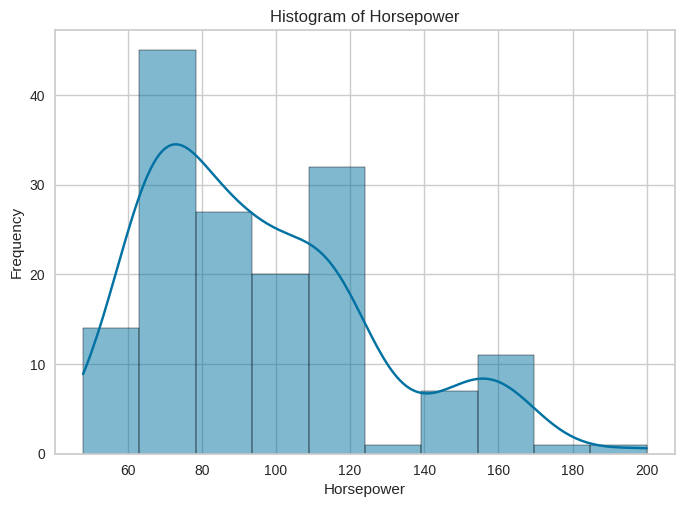

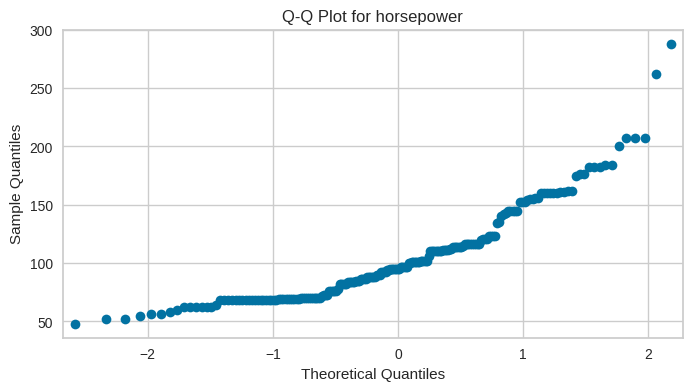

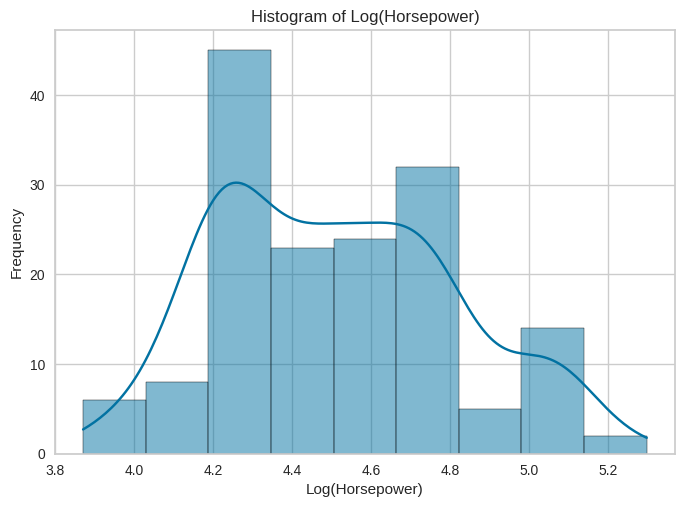

The log-transformed 'horsepower' data is significantly different from a normal distribution.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import scipy.stats as stats

# Plot a histogram for 'horsepower'
sns.histplot(df_cleaned['horsepower'], kde=True)
plt.xlabel('Horsepower')
plt.ylabel('Frequency')
plt.title('Histogram of Horsepower')
plt.show()

# Create a Q-Q plot for 'horsepower'
numeric_variable = 'horsepower'
fig, ax = plt.subplots(figsize=(8, 4))
sm.qqplot(df[numeric_variable], line='s', ax=ax)
ax.set_title(f'Q-Q Plot for {numeric_variable}')
plt.show()

# Logarithmic transformation
log_horsepower = np.log(df_cleaned['horsepower'])

# Create a histogram for the log-transformed 'horsepower'
sns.histplot(log_horsepower, kde=True)
plt.xlabel('Log(Horsepower)')
plt.ylabel('Frequency')
plt.title('Histogram of Log(Horsepower)')
plt.show()

# Perform Shapiro-Wilk test on log-transformed 'horsepower'
shapiro_test_result = stats.shapiro(log_horsepower)

# Check the p-value
p_value = shapiro_test_result[1]

if p_value > 0.05:
    print("The log-transformed 'horsepower' data is approximately normally distributed.")
else:
    print("The log-transformed 'horsepower' data is significantly different from a normal distribution.")


The shape of the histogram illustrates the distribution of 'horsepower' in the dataset. The height of each bar represents the number of cars with horsepower values in the corresponding range. The overall pattern of the bars indicates how the data is distributed.

From above, we can see that the bars are skewed to the right (toward lower horsepower values) and there are fewer cars with higher horsepower, it suggests a right-skewed skewed distribution. Majority cars have lower power output compared to the mean horsepower of the dataset.

The Q-Q Plot for horsepower also signifies the same: right skewed distribution.

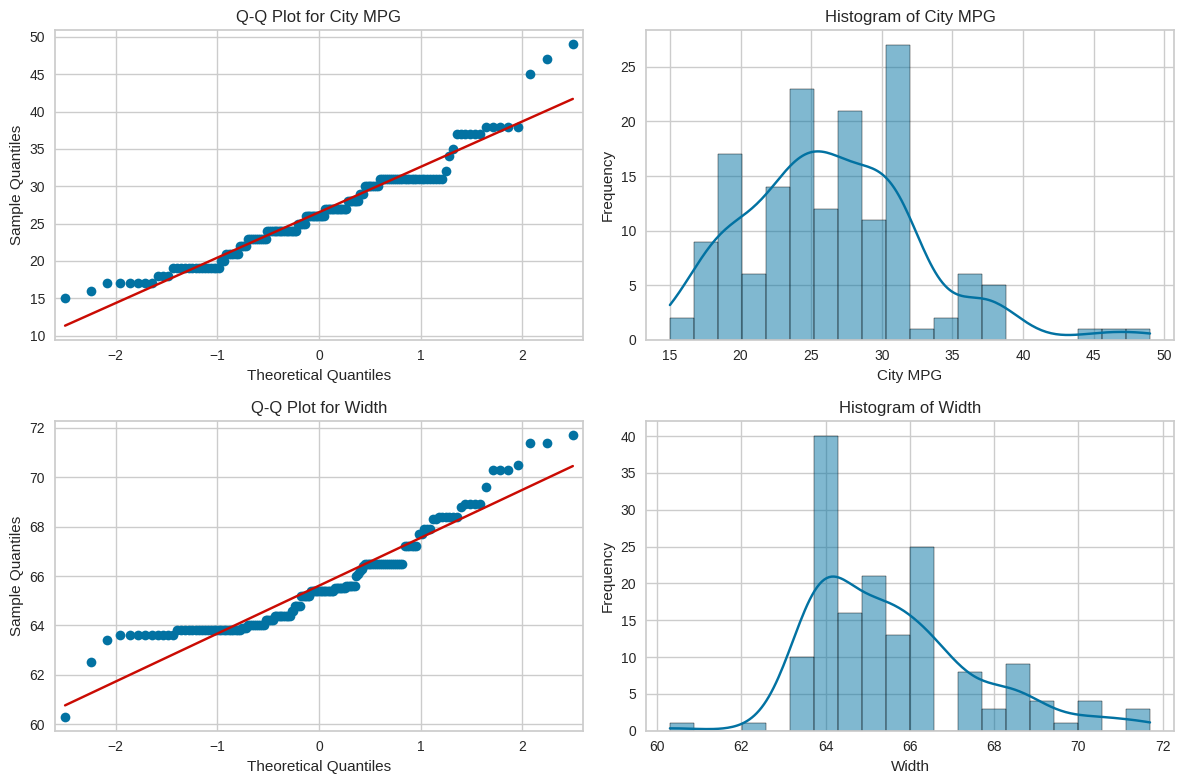

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

city_mpg_data = df_cleaned['city-mpg']
width_data = df_cleaned['width']

# Create a 2x2 grid of subplots for Q-Q plots and histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Q-Q Plot for 'city-mpg'
sm.qqplot(city_mpg_data, line='s', ax=axes[0, 0])
axes[0, 0].set_title('Q-Q Plot for City MPG')

# Histogram for 'city-mpg'
sns.histplot(city_mpg_data, kde=True, bins=20, ax=axes[0, 1])
axes[0, 1].set_xlabel('City MPG')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Histogram of City MPG')

# Q-Q Plot for 'width'
sm.qqplot(width_data, line='s', ax=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot for Width')

# Histogram for 'width'
sns.histplot(width_data, kde=True, bins=20, ax=axes[1, 1])
axes[1, 1].set_xlabel('Width')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Histogram of Width')

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()


The two numerical values height and city-mpg follow a roughly normal distribution.
There are a few outliers.

The 'length' variable significantly departs from a normal distribution (p-value <= 0.05).


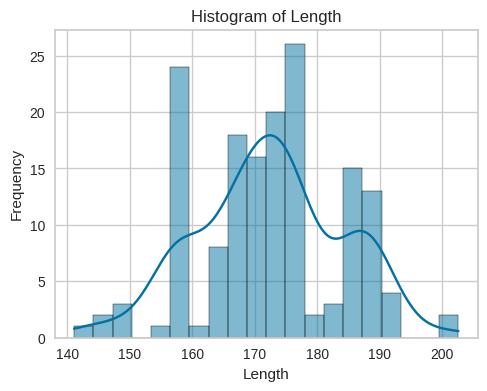

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

length_data = df_cleaned['length']

# Create a histogram for 'length'
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(length_data, kde=True, bins=20)
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.title('Histogram of Length')


# Perform the Shapiro-Wilk test to see if it's a normal distribution
shapiro_test_result = stats.shapiro(length_data)

# Check the p-value
p_value = shapiro_test_result[1]

if p_value > 0.05:
    print("The 'length' variable appears to be normally distributed (p-value > 0.05).")
else:
    print("The 'length' variable significantly departs from a normal distribution (p-value <= 0.05).")


# What are the distributions of the predictor variables?

<Figure size 600x400 with 0 Axes>

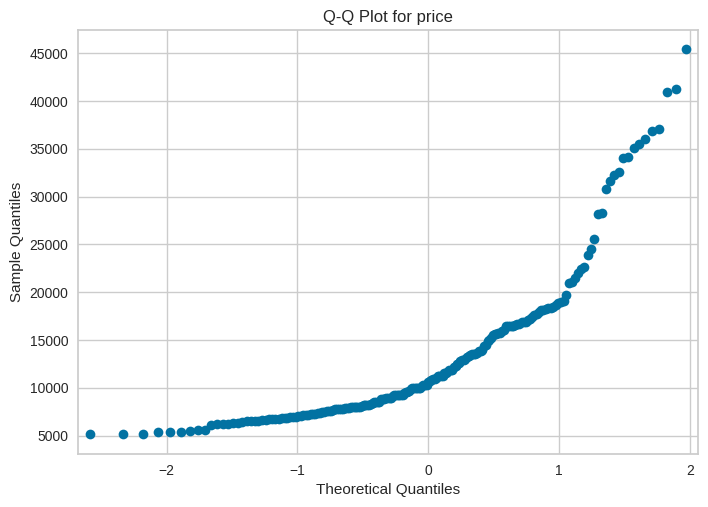

<Figure size 600x400 with 0 Axes>

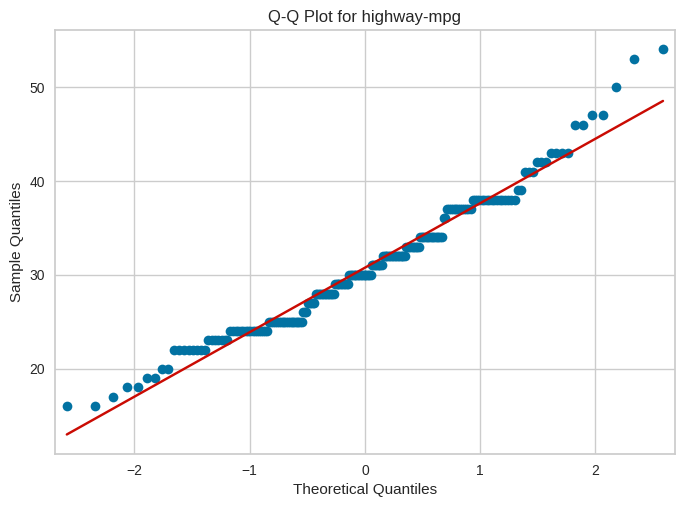

<Figure size 600x400 with 0 Axes>

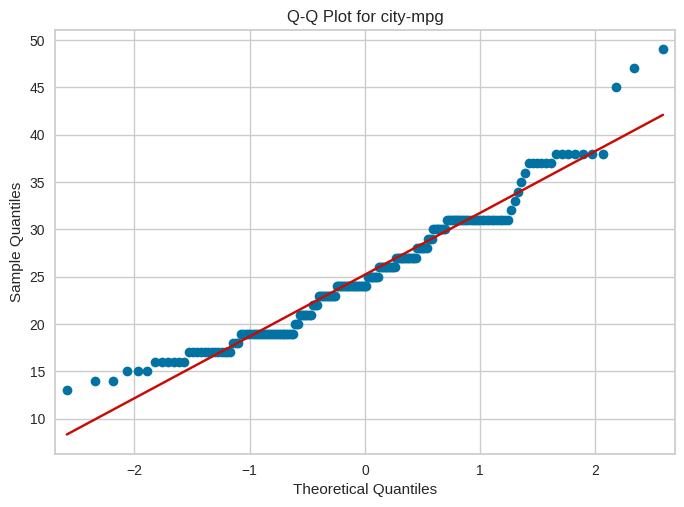

<Figure size 600x400 with 0 Axes>

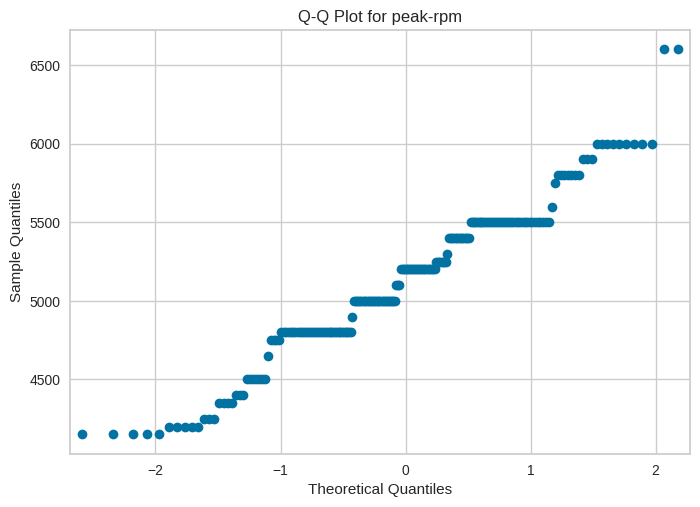

<Figure size 600x400 with 0 Axes>

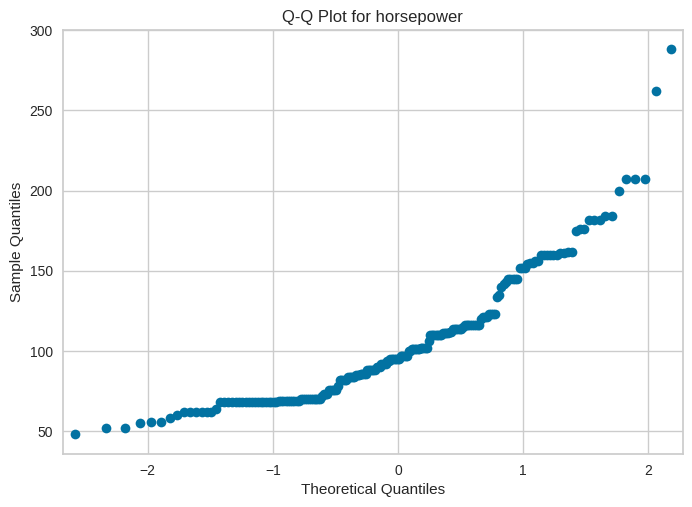

<Figure size 600x400 with 0 Axes>

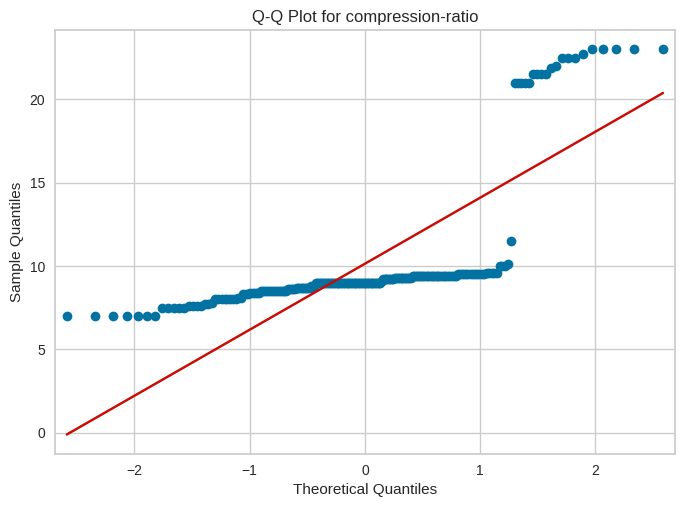

<Figure size 600x400 with 0 Axes>

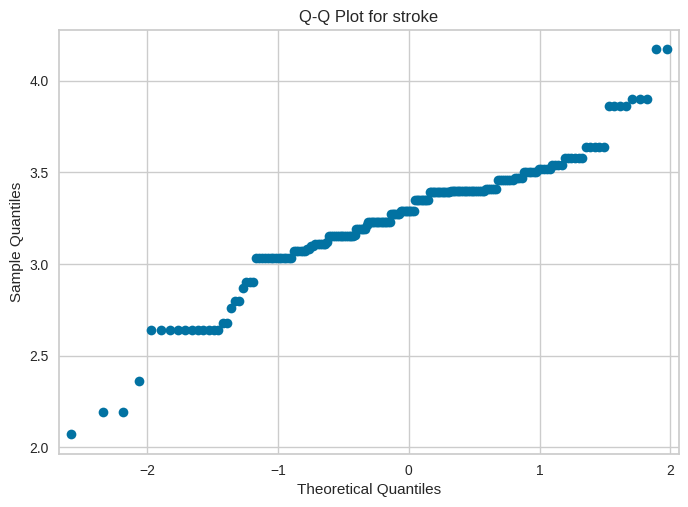

<Figure size 600x400 with 0 Axes>

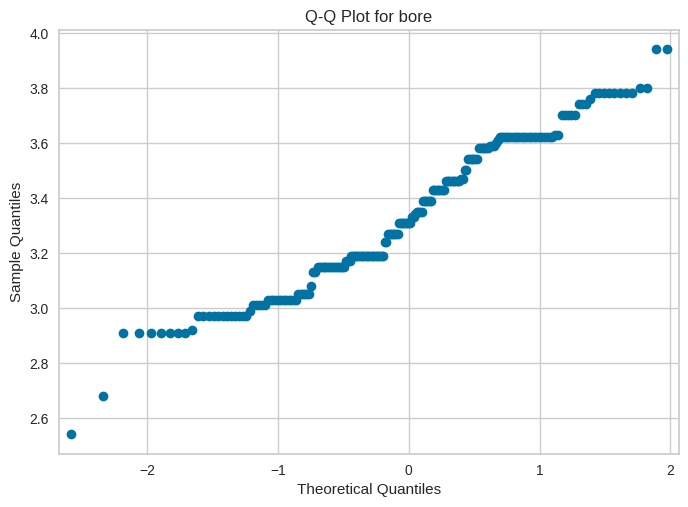

<Figure size 600x400 with 0 Axes>

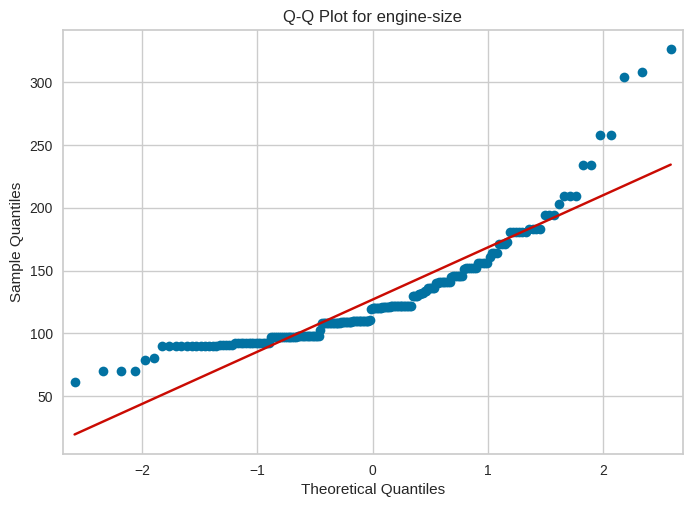

<Figure size 600x400 with 0 Axes>

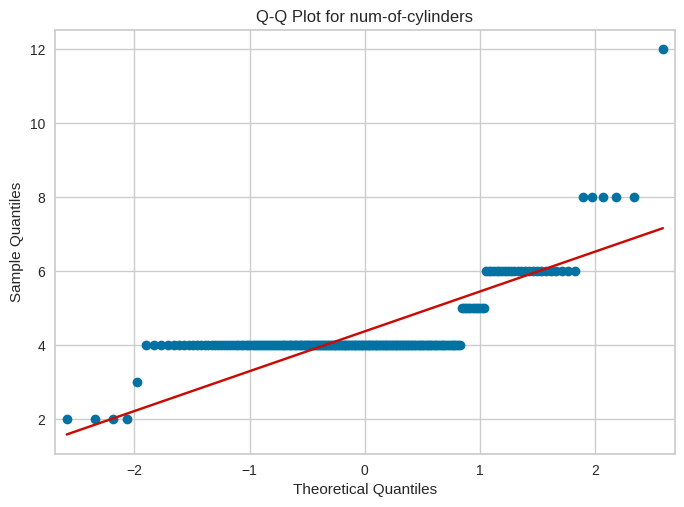

<Figure size 600x400 with 0 Axes>

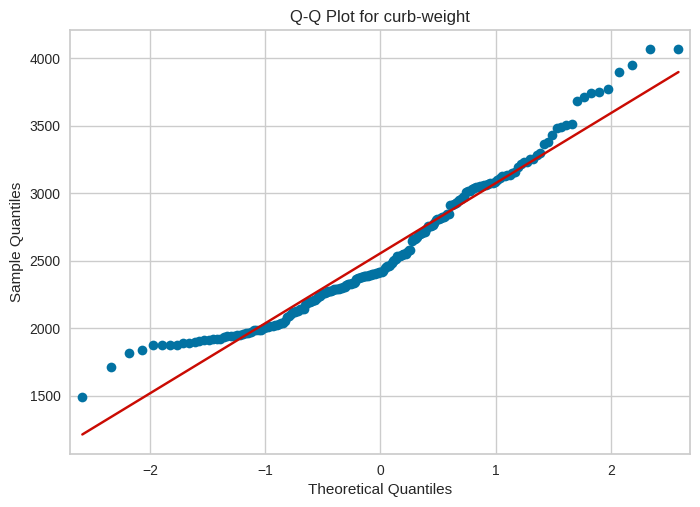

<Figure size 600x400 with 0 Axes>

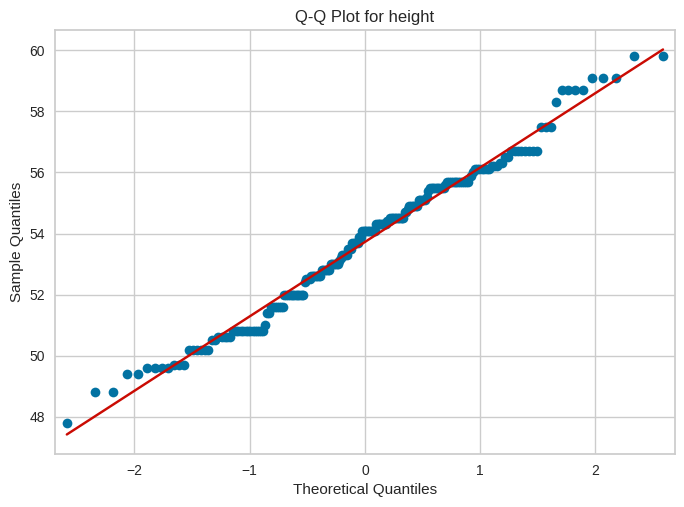

<Figure size 600x400 with 0 Axes>

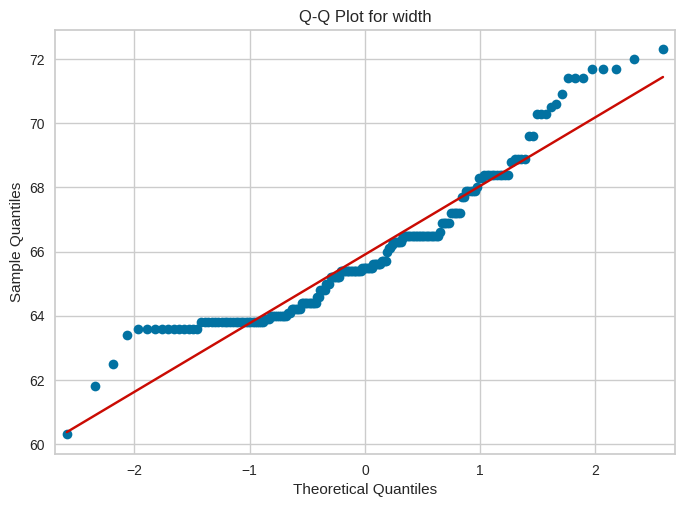

<Figure size 600x400 with 0 Axes>

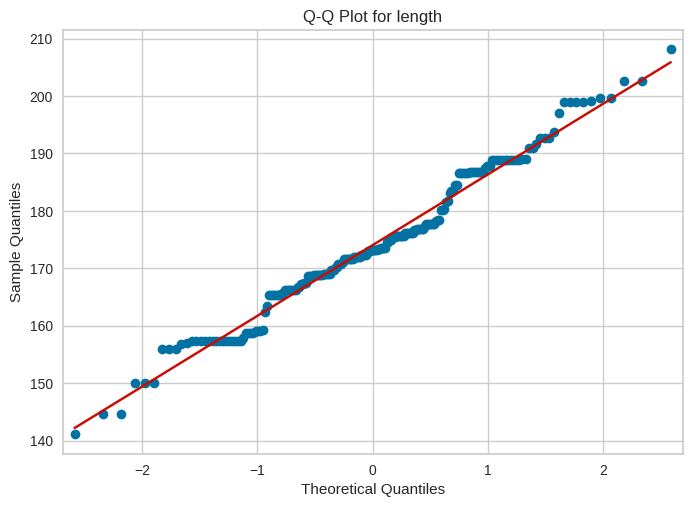

<Figure size 600x400 with 0 Axes>

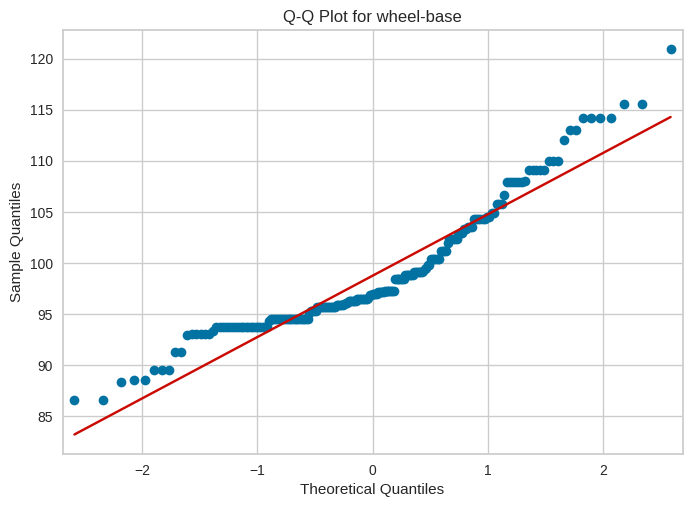

<Figure size 600x400 with 0 Axes>

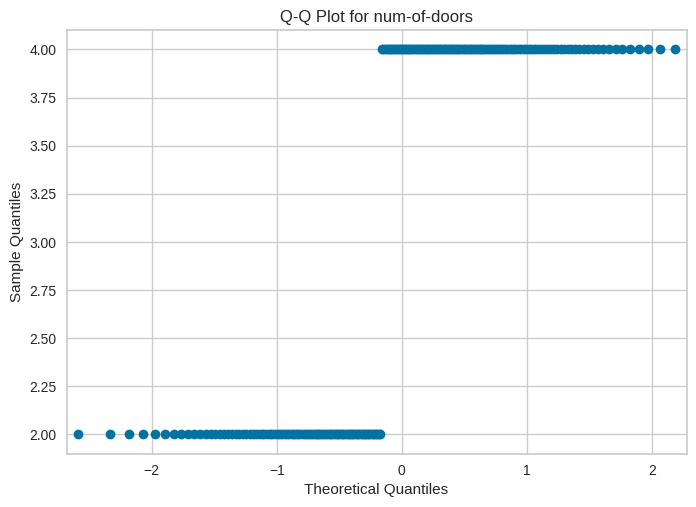

<Figure size 600x400 with 0 Axes>

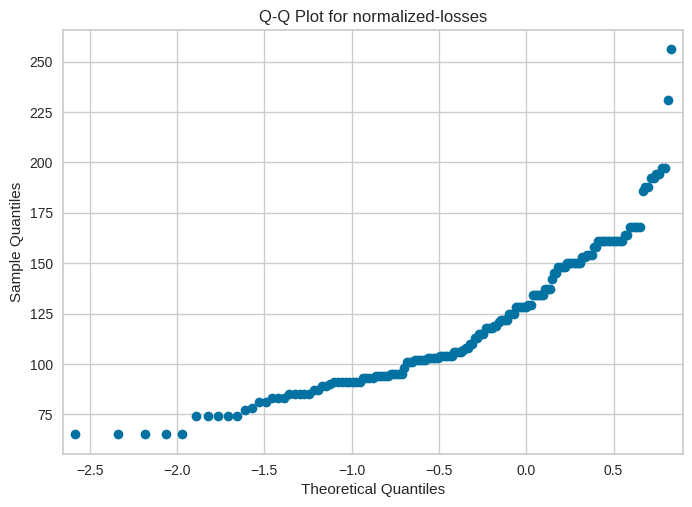

In [ ]:
#all the other qq plots of num variables

import matplotlib.pyplot as plt
import statsmodels.api as sm



# Select only the numeric columns
numeric_columns = df_cleaned.select_dtypes(include=['number'])

# Create Q-Q plots for each numeric variable
for column in numeric_columns.columns:
    plt.figure(figsize=(6, 4))
    sm.qqplot(df[column], line='s')
    plt.title(f'Q-Q Plot for {column}')
    plt.show()


The above q-q plots suggest that variables like height, curb-weight follow a roughly normal distribution.

# Which independent variables have missing data? How much?



In [ ]:
#the data has been cleaned and saved in a new frame df_cleaned but for purpose of answering above question we take original frame df
# Check for missing values in each column
#this has already been calculated before, just re-iterating

missing_data = df.isnull().sum()

# Filter out columns with missing values
columns_with_missing_data = missing_data[missing_data > 0]

# Display the columns with missing data and the number of missing values
print("Independent Variables with Missing Data:")
print(columns_with_missing_data)


Independent Variables with Missing Data:
price                 4
peak-rpm              2
horsepower            2
stroke                4
bore                  4
num-of-doors          2
normalized-losses    41
dtype: int64


# Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)


 We will use 3 methods to predict our target variable that is 'price'.

 1st: Using **column-wise correlation** analysis, we find how each each variable is correlated to the other variable. We will then visualize this using a heat map.

 2nd: We use select **KBest method** for feature selection.

 3rd: We use **Feature correlation visualizer by Yellowbrick** as the third method to identify the independent variables useful to predict the target in our case-- price of the automobile.


In [ ]:

df_cleaned.corr()

<ipython-input-73-c9d43ba49b48>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_cleaned.corr()


,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,engine-size,num-of-cylinders,curb-weight,height,width,length,wheel-base,num-of-doors,normalized-losses
price,1.000000,-0.720090,-0.692273,-0.171916,0.759874,0.209361,0.160664,0.533890,0.841496,0.641578,0.893639,0.244836,0.843371,0.760952,0.734419,0.162152,0.202761
highway-mpg,-0.720090,1.000000,0.971999,-0.032777,-0.827941,0.221483,-0.012934,-0.590850,-0.714095,-0.519366,-0.789338,-0.226136,-0.693339,-0.724599,-0.611750,-0.160870,-0.188564
city-mpg,-0.692273,0.971999,1.000000,-0.052929,-0.837214,0.278332,-0.020055,-0.590440,-0.699139,-0.484712,-0.762155,-0.199737,-0.666684,-0.724544,-0.580657,-0.165831,-0.235523
peak-rpm,-0.171916,-0.032777,-0.052929,1.000000,0.074057,-0.416769,-0.011312,-0.312269,-0.284686,-0.118165,-0.259988,-0.245864,-0.232216,-0.234074,-0.289234,-0.168896,0.237697
horsepower,0.759874,-0.827941,-0.837214,0.074057,1.000000,-0.162305,0.148804,0.560239,0.812073,0.618514,0.790095,0.034317,0.681872,0.672063,0.516948,0.029959,0.290511
compression-ratio,0.209361,0.221483,0.278332,-0.416769,-0.162305,1.000000,0.243587,0.015119,0.141097,0.061637,0.224724,0.233308,0.258752,0.184814,0.291431,0.115414,-0.127259
stroke,0.160664,-0.012934,-0.020055,-0.011312,0.148804,0.243587,1.000000,-0.102581,0.299683,0.132264,0.173844,-0.091313,0.196619,0.121073,0.167449,-0.028945,0.063330
bore,0.533890,-0.590850,-0.590440,-0.312269,0.560239,0.015119,-0.102581,1.000000,0.595737,0.134820,0.645792,0.254836,0.572554,0.646318,0.578159,0.214539,-0.031558
engine-size,0.841496,-0.714095,-0.699139,-0.284686,0.812073,0.141097,0.299683,0.595737,1.000000,0.770809,0.888626,0.111083,0.779253,0.725953,0.649206,0.085100,0.207820
num-of-cylinders,0.641578,-0.519366,-0.484712,-0.118165,0.618514,0.061637,0.132264,0.134820,0.770809,1.000000,0.595873,-0.058612,0.507360,0.389477,0.312733,-0.013527,0.268157


<ipython-input-74-0d5f30966e33>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_cleaned.corr()


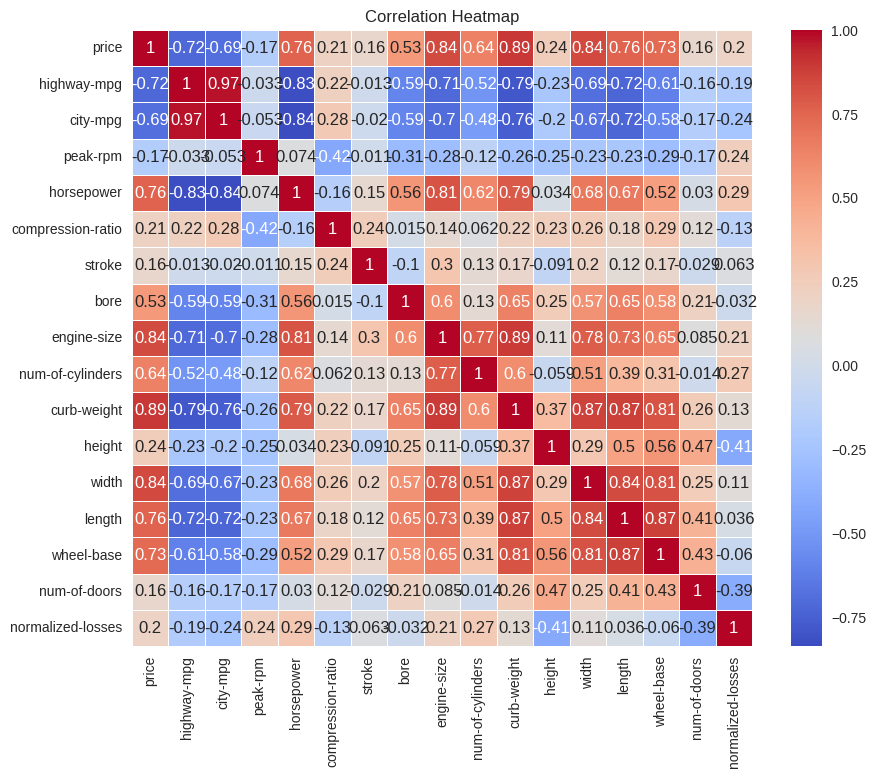

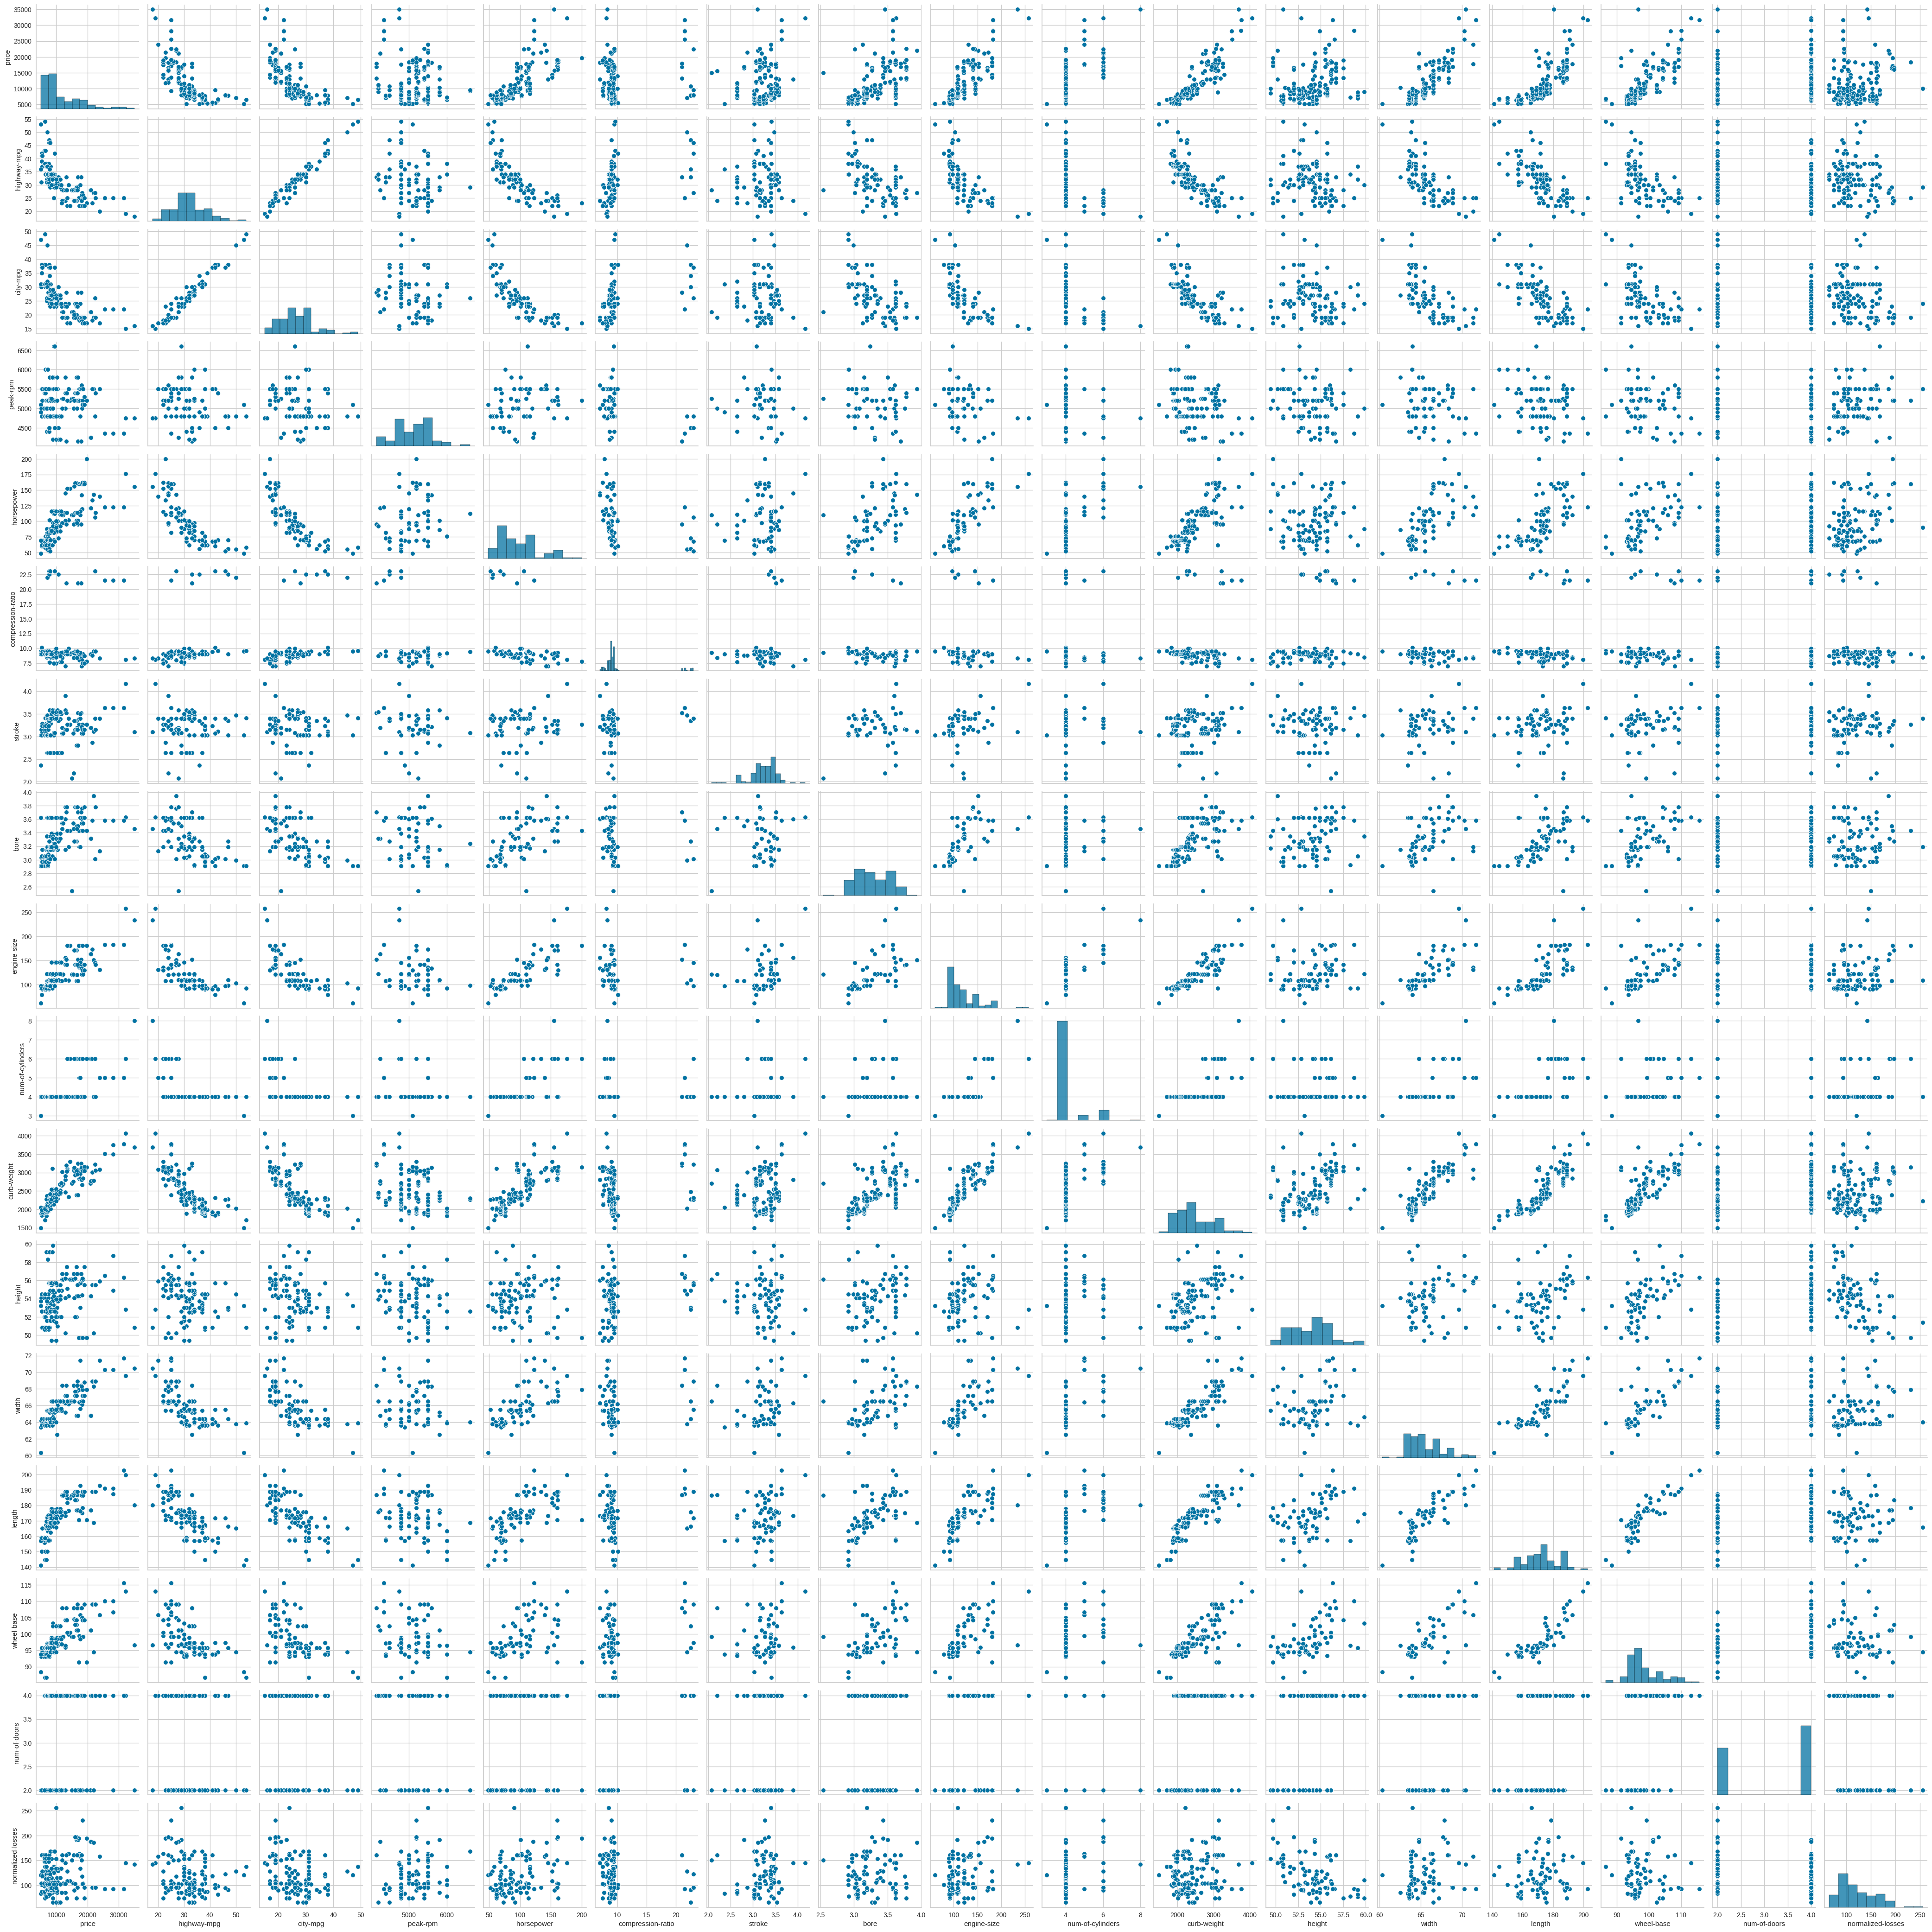

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_cleaned.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


sns.pairplot(df_cleaned)


The above pair-plot is used to check for co-linearity, we see that there is multicolinearity the highest being in city-mpg and highway-mpg.

# Normalization
We will now normalize the data.
Normalization is a crucial preprocessing step that enhances the performance and stability of machine learning models by ensuring that features are on a consistent scale, preventing issues related to differences in feature magnitudes, and making the learning process more efficient and effective.

We use the **MinMaxScaler** to normalize the data, this technique is suitable when you want to preserve the relationships between the values in your dataset but ensure that they fall within a standardized range.


In [ ]:
df_cleaned.head()

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
0,13950.0,30,24,5500.0,102.0,10.0,3.4,3.19,mpfi,109,...,176.6,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0
1,17450.0,22,18,5500.0,115.0,8.0,3.4,3.19,mpfi,136,...,176.6,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0
2,17710.0,25,19,5500.0,110.0,8.5,3.4,3.19,mpfi,136,...,192.7,105.8,front,fwd,sedan,4.0,std,gas,audi,158.0
3,23875.0,20,17,5500.0,140.0,8.3,3.4,3.13,mpfi,131,...,192.7,105.8,front,fwd,sedan,4.0,turbo,gas,audi,158.0
4,16430.0,29,23,5800.0,101.0,8.8,2.8,3.50,mpfi,108,...,176.8,101.2,front,rwd,sedan,2.0,std,gas,bmw,192.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the Min-Max scaler
scaler = MinMaxScaler()

# Select the columns you want to normalize (e.g., all numeric columns)
numeric_columns = df_cleaned.select_dtypes(include=['number'])

# Fit the scaler to your data and transform the data
normalized_data = scaler.fit_transform(numeric_columns)

# Create a DataFrame with the normalized data
normalized_df = pd.DataFrame(normalized_data, columns=numeric_columns.columns)

# Display the first few rows of the normalized DataFrame
print(normalized_df.head())


      price  highway-mpg  city-mpg  peak-rpm  horsepower  compression-ratio  \
0  0.295010     0.333333  0.264706  0.551020    0.355263            0.18750   
1  0.411918     0.111111  0.088235  0.551020    0.440789            0.06250   
2  0.420603     0.194444  0.117647  0.551020    0.407895            0.09375   
3  0.626528     0.055556  0.058824  0.551020    0.605263            0.08125   
4  0.377848     0.305556  0.235294  0.673469    0.348684            0.11250   

     stroke      bore  engine-size  num-of-cylinders  curb-weight    height  \
0  0.633333  0.464286     0.243655               0.2     0.329325  0.471154   
1  0.633333  0.464286     0.380711               0.4     0.518231  0.471154   
2  0.633333  0.464286     0.380711               0.4     0.525989  0.605769   
3  0.633333  0.421429     0.355330               0.4     0.619860  0.625000   
4  0.347619  0.685714     0.238579               0.2     0.351823  0.471154   

      width    length  wheel-base  num-of-doors  n

# Which predictor variables are most important?

Below uses Kbest method to answer the above question.

In [ ]:


from sklearn.feature_selection import SelectKBest, f_regression


X = normalized_df  # Independent variables
y = df_cleaned['price']  # Target variable

# Create a SelectKBest instance with f_regression scoring
kbest = SelectKBest(score_func=f_regression, k=5)  # Select the top 5 features

# Fit and transform the data to select the best features
X_new = kbest.fit_transform(X, y)

# Get the indices of the selected features
selected_indices = kbest.get_support(indices=True)

# Get the names of the selected columns
selected_columns = normalized_df.columns[selected_indices]

# Display the selected columns
print("Selected columns:")
print(selected_columns)


Selected columns:
Index(['price', 'engine-size', 'curb-weight', 'width', 'length'], dtype='object')


The above predictors are the most important.
The SelectKBest method evaluates the relationship between each independent variable and the target variable ('price' in this case) based on a scoring function (in this case, 'f_regression'). It ranks the features based on their individual predictive power with respect to the target variable.

If 'price' is highly correlated with itself and has a significant linear relationship with the other features, it may rank highly in the feature selection process. Essentially, 'price' is very predictive of itself, which might lead to it being selected as one of the top features.

In practice, if we are using 'price' as the target variable, we typically exclude 'price' from the feature set when training a predictive model because it wouldn't provide useful information for predicting itself. We can simply remove 'price' from the selected features if it is not intended to be used as an independent variable in your modeling process.

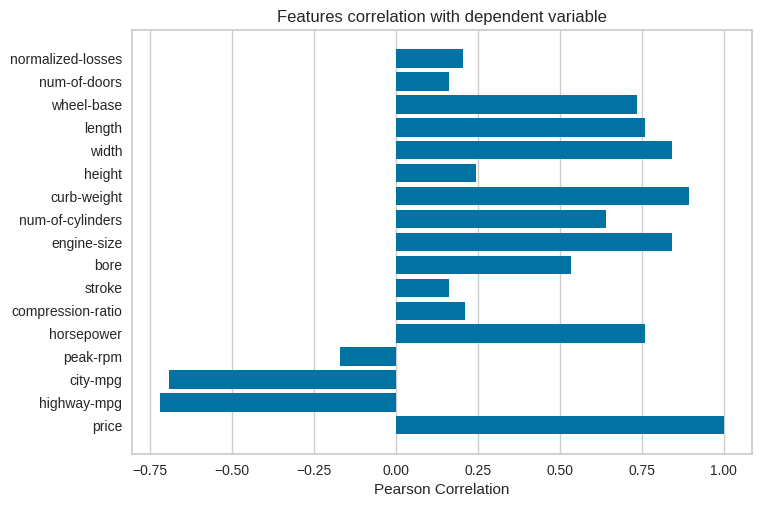

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from yellowbrick.target import FeatureCorrelation

# Assuming 'price' is your target variable
X = normalized_df  # Independent variables
y = df_cleaned['price']  # Target variable

# Create a FeatureCorrelation visualizer
visualizer = FeatureCorrelation(method='pearson', labels=X.columns)

# Fit the visualizer to your data
visualizer.fit(X, y)

# Draw the feature correlation plot
visualizer.poof()


# Do the training and test sets have the same data?


We first divide the normalized dataset into 2 parts 80% training and 20% test.

We then use shape function to find if the two datasets are same.

In [ ]:
#Dividing the dataset into training and testing sets

X = normalized_df.drop(['price'], axis=1)
y = normalized_df['price']


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (127, 16)
X_test shape: (32, 16)
y_train shape: (127,)
y_test shape: (32,)


The above shapes of the training and test data show that testing and training data do not overlap.

Now we use Random Forest Regression to train our model and find out the accuracy using Mean squared error and r-squared.
We use regression to predict price which is our target variable.










In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor with desired hyperparameters
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
random_forest_regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = random_forest_regressor.predict(X_test)

# Evaluate the model's performance (e.g., using mean squared error)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate the coefficient of determination (R-squared)
r_squared = r2_score(y_test, y_pred)
print("Coefficient of Determination (R-squared):", r_squared)



Mean Squared Error: 0.003621856568626233
Coefficient of Determination (R-squared): 0.8175735309363708


A **mean squared error (MSE)** of 0.0036 is a measure of the model's accuracy in predicting the 'price' target variable. In this context, the MSE represents the average squared difference between the actual 'price' values (in test set) and the predicted 'price' values generated by Random Forest Regressor model.

A low MSE is a positive sign, indicating that our model is performing well in predicting 'price.'



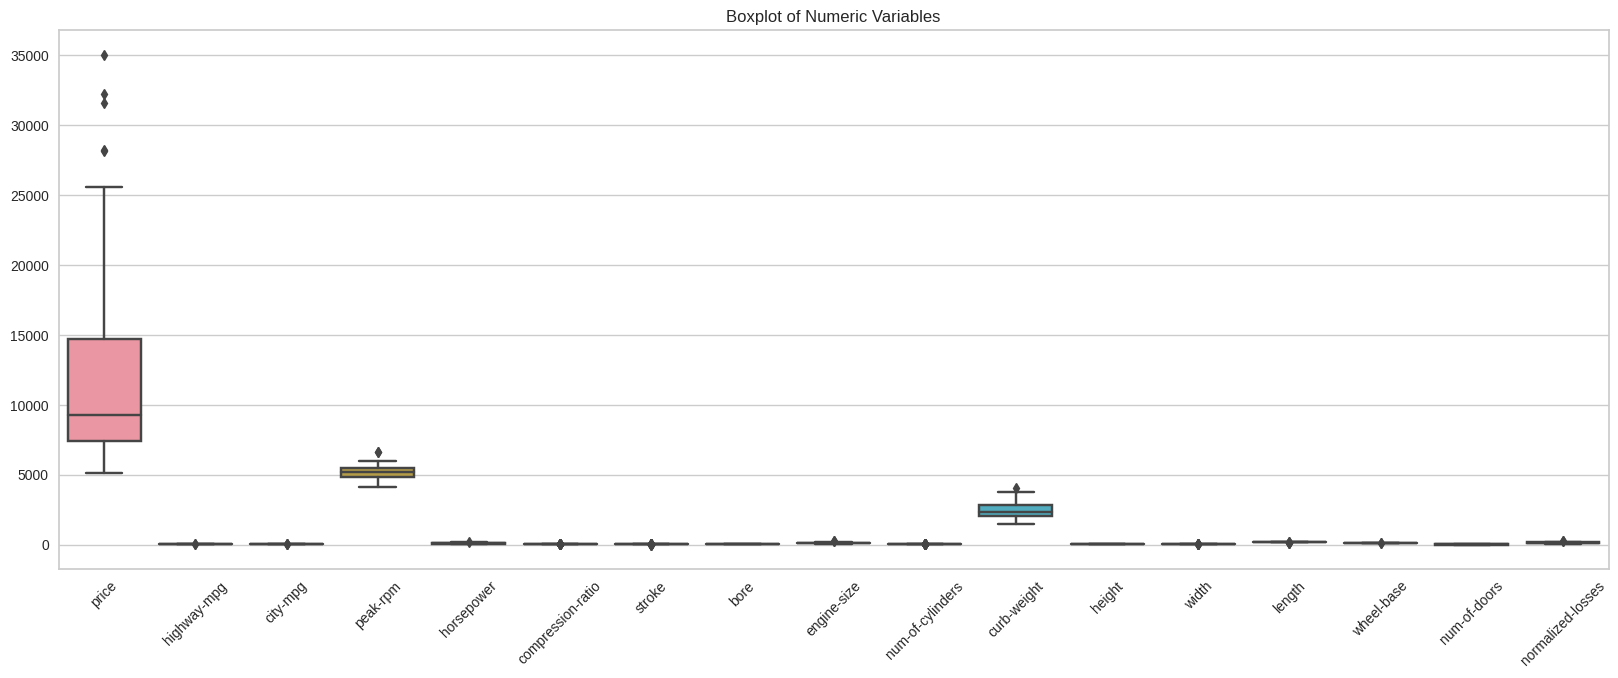

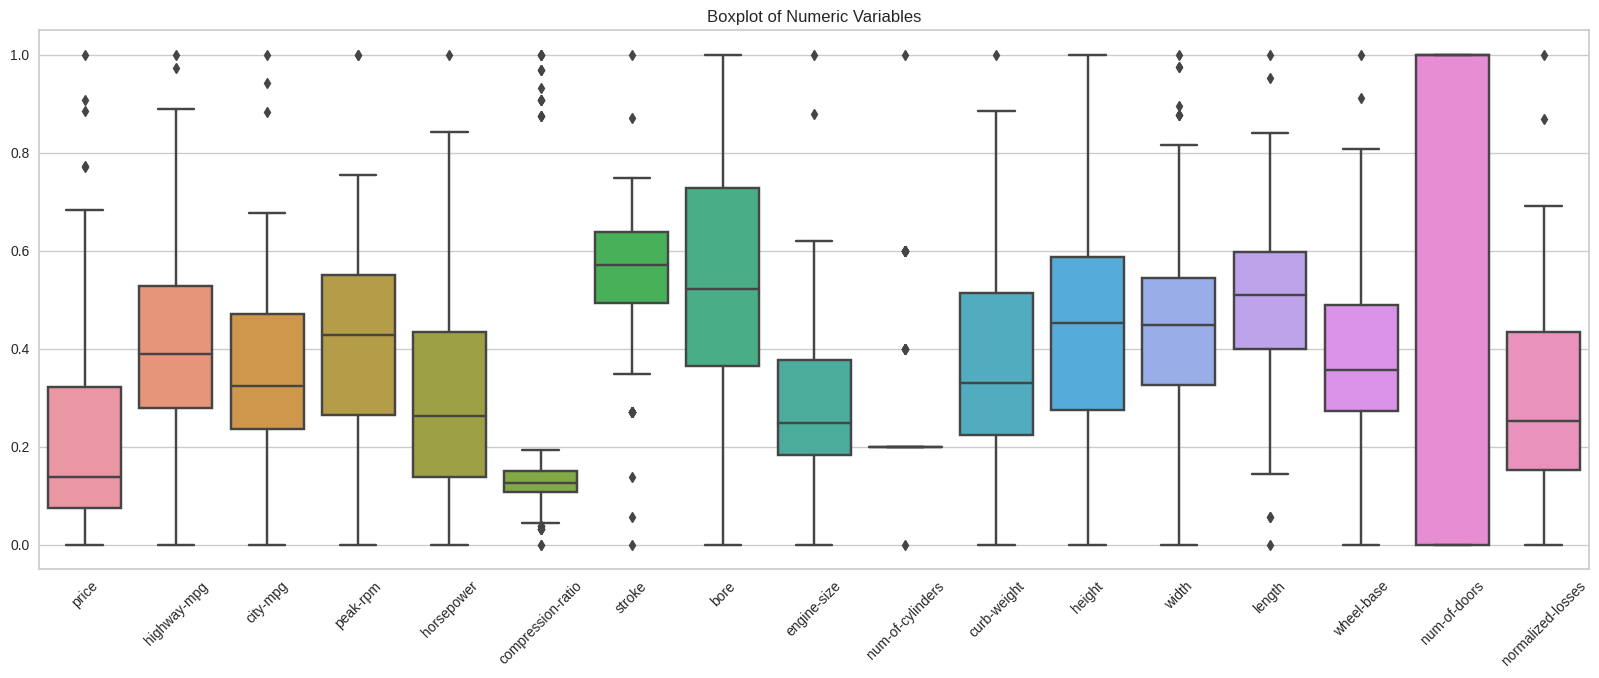

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric variables from your DataFrame (df_cleaned)
numeric_variables = df_cleaned.select_dtypes(include=['number'])

# Set the figure size
plt.figure(figsize=(20, 7))

# Create a boxplot for all numeric variables
sns.boxplot(data=numeric_variables)

# Set a title
plt.title('Boxplot of Numeric Variables')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()


# Select only the numeric variables from your DataFrame (df_cleaned)
numeric_variables = normalized_df.select_dtypes(include=['number'])

# Set the figure size
plt.figure(figsize=(20, 7))

# Create a boxplot for all numeric variables
sns.boxplot(data=numeric_variables)

# Set a title
plt.title('Boxplot of Numeric Variables')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()




Creating a subplot for variables when not normalized does not correctly depict the ranges of the variables.
When plotted using the normalized data frame we see the following:
* highway-mpg and city-mpg are approximately in the same range meaning that miles per gallon does not hugely differ.
* There are few outliers which indicate only few cars cost higher than the most cars.




Here's what you can infer from the subplots about the ranges of variables:

Spread and Variation: The width of the box (interquartile range or IQR) in each subplot indicates the range in which the middle 50% of the data falls. A wider box suggests a larger spread of values within that variable.

Median: The horizontal line inside the box represents the median (50th percentile) of the data. It provides insight into the central tendency of the variable's distribution.

Outliers: Any data points beyond the "whiskers" (lines extending from the box) are considered potential outliers. Outliers can indicate extreme values or data points that are significantly different from the rest of the data.

Skewness: The shape of the boxplot can suggest whether the distribution is skewed. For example, if one whisker is longer than the other, it may indicate skewness in that direction.

Comparisons: By having multiple subplots, you can easily compare the range and distribution of different variables side by side. For example, you can visually compare which variables have wider or narrower spreads, which have more outliers, or which have medians at different positions.




In [ ]:
#checking the data before removing outliers and then calculating how that affected our model.

X_train.head()

,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,engine-size,num-of-cylinders,curb-weight,height,width,length,wheel-base,num-of-doors,normalized-losses
75,0.138889,0.058824,0.428571,1.000000,0.05000,0.571429,0.635714,0.609137,0.6,0.640419,0.028846,0.666667,0.481301,0.162069,0.0,0.675393
138,0.166667,0.117647,0.428571,0.743421,0.14375,0.609524,0.521429,0.558376,0.6,0.592708,0.250000,0.649123,0.689431,0.562069,0.0,0.691099
2,0.194444,0.117647,0.551020,0.407895,0.09375,0.633333,0.464286,0.380711,0.4,0.525989,0.605769,0.973684,0.839024,0.662069,1.0,0.486911
86,0.555556,0.470588,0.551020,0.131579,0.15000,0.552381,0.307143,0.147208,0.2,0.185803,0.115385,0.307018,0.263415,0.244828,1.0,0.465969
45,0.194444,0.205882,0.081633,0.493421,0.90625,0.747619,0.742857,0.619289,0.4,0.877424,0.894231,0.877193,0.809756,0.806897,1.0,0.146597


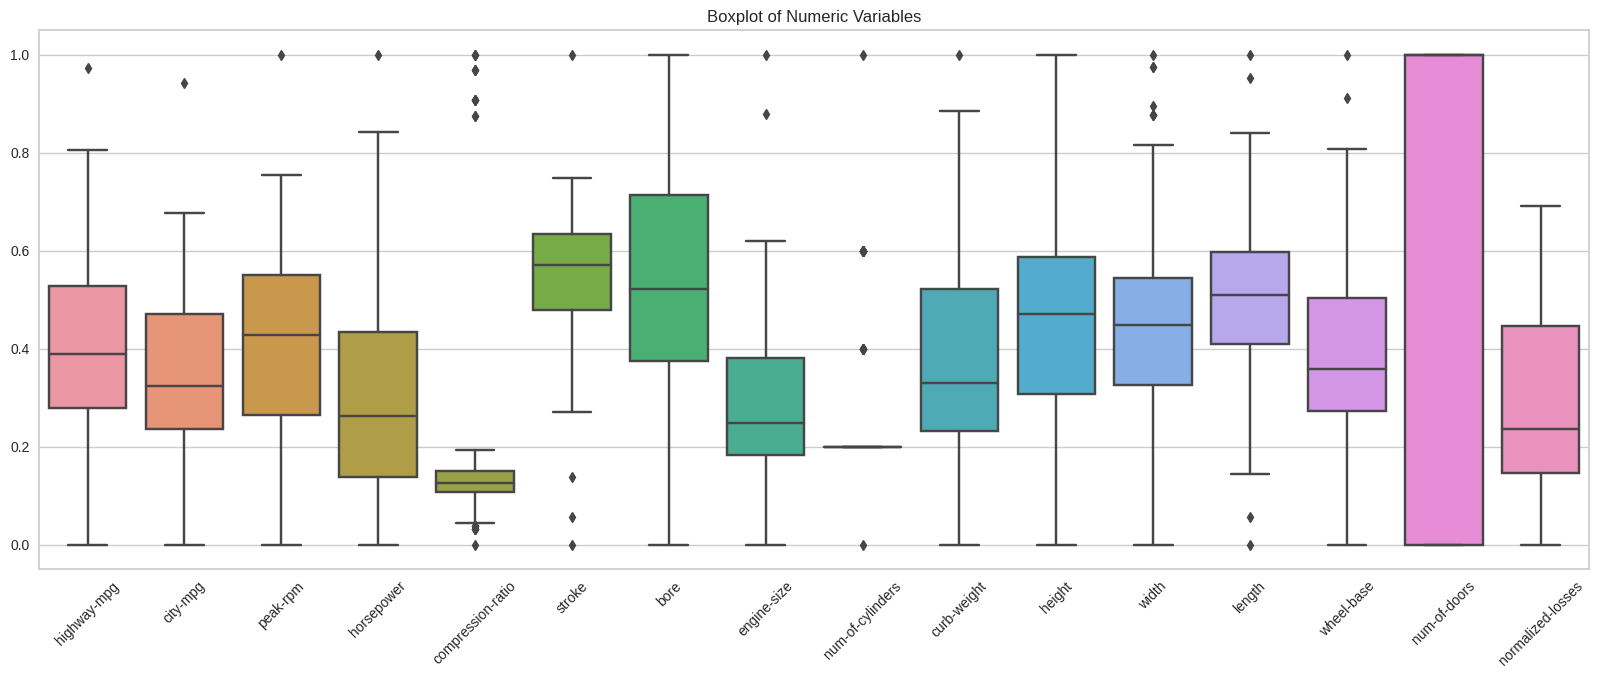

In [ ]:
#plotting a boxplot to visualize the outliers in the X_train dataframes.

import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric variables from your DataFrame (df_cleaned)
numeric_variables = X_train.select_dtypes(include=['number'])

# Set the figure size
plt.figure(figsize=(20, 7))

# Create a boxplot for all numeric variables
sns.boxplot(data=numeric_variables)

# Set a title
plt.title('Boxplot of Numeric Variables')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()






# Remove outliers and keep outliers (does if have an effect of the final predictive model)

In the below function we remove the outliers using the IQR method. We pass the training dataset and remove the outliers.

We then use this training set to train our model and to see if there is any change in the accuracy using the same method as before i.e Mean squared error.

In [ ]:


import pandas as pd

# Defining a function to remove outliers using the IQR method
def remove_outliers_iqr(df, columns, threshold=1.5):
    """
    Remove outliers from specified columns in a DataFrame using the IQR method.

    Args:
    df (pd.DataFrame): The DataFrame containing the data.
    columns (list): A list of column names to check for outliers.
    threshold (float): The threshold for defining outliers. Default is 1.5.

    Returns:
    pd.DataFrame: A DataFrame with outliers removed.
    """
    df_no_outliers = df.copy()
    for column in columns:
        Q1 = df_no_outliers[column].quantile(0.25)
        Q3 = df_no_outliers[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        df_no_outliers = df_no_outliers[(df_no_outliers[column] >= lower_bound) & (df_no_outliers[column] <= upper_bound)]
    return df_no_outliers




# Define the columns for which you want to remove outliers
columns_to_check = ['engine-size', 'curb-weight', 'width', 'length']

# Remove outliers from X_train
X_train_no_outliers = remove_outliers_iqr(X_train, columns_to_check)

# Display the shape of the resulting X_train DataFrame
print("Shape of X_train after removing outliers:", X_train_no_outliers.shape)


# Remove outliers from y_train based on the same rows removed from X_train
y_train_no_outliers = y_train.loc[X_train_no_outliers.index]

# Display the shape of the resulting y_train Series
print("Shape of y_train after removing outliers:", y_train_no_outliers.shape)



Shape of X_train after removing outliers: (117, 16)
Shape of y_train after removing outliers: (117,)


Shape before dropping the outliers:

X_train shape: (127, 16)

y_train shape: (127, )


After removing outliers above it is:

Shape of X_train after removing outliers: (117, 16)

Shape of y_train after removing outliers: (117,)


Now we use our new dataframes:
X_train_no_outliers, y_train_no_outliers as training data for our new model and then use mean squared error to find the accuracy.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor with desired hyperparameters
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
random_forest_regressor.fit(X_train_no_outliers, y_train_no_outliers)

# Make predictions on the testing data
y_pred = random_forest_regressor.predict(X_test)

# Evaluate the model's performance (e.g., using mean squared error)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate the coefficient of determination (R-squared)
r_squared = r2_score(y_test, y_pred)
print("Coefficient of Determination (R-squared):", r_squared)

Mean Squared Error: 0.0033036715593358656
Coefficient of Determination (R-squared): 0.8335999435383022


# Remove outliers and keep outliers (does if have an effect of the final predictive model)?

The value mean squared error reduced after the removing outliers, meaning that the accuracy of prediction was improved after removal of outliers.



mean squared error before removal of outliers: 0.0036
mean squared error after removal of outliers: 0.0033

The accuracy improved by approximately 8.33%.

# Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods.

How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

In [ ]:
df_imputation= normalized_df[['price']]
df_imputation['1_percent'] = df_imputation[['price']]
df_imputation['5_percent'] = df_imputation[['price']]
df_imputation['10_percent'] = df_imputation[['price']]
df_imputation.head()

<ipython-input-151-7ae6453bb4ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imputation['1_percent'] = df_imputation[['price']]
<ipython-input-151-7ae6453bb4ae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imputation['5_percent'] = df_imputation[['price']]
<ipython-input-151-7ae6453bb4ae>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

,price,1_percent,5_percent,10_percent
0,0.295010,0.295010,0.295010,0.295010
1,0.411918,0.411918,0.411918,0.411918
2,0.420603,0.420603,0.420603,0.420603
3,0.626528,0.626528,0.626528,0.626528
4,0.377848,0.377848,0.377848,0.377848


In [ ]:
def get_percent_missing(dataframe):

    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_df = pd.DataFrame({'column_name': dataframe.columns,
                                     'percent_missing': percent_missing})
    return missing_value_df

print(get_percent_missing(df_imputation))


           column_name  percent_missing
price            price              0.0
1_percent    1_percent              0.0
5_percent    5_percent              0.0
10_percent  10_percent              0.0


In [ ]:
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan


In [ ]:
create_missing(df_imputation, 0.01, '1_percent')
create_missing(df_imputation, 0.05, '5_percent')
create_missing(df_imputation, 0.1, '10_percent')

<ipython-input-153-b0d10bbcf223>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan


In [ ]:
print(get_percent_missing(df_imputation))

           column_name  percent_missing
price            price         0.000000
1_percent    1_percent         2.515723
5_percent    5_percent         9.433962
10_percent  10_percent        20.125786


In [ ]:
# Store Index of NaN values in each coloumns
number_1_idx = list(np.where(df_imputation['1_percent'].isna())[0])
number_5_idx = list(np.where(df_imputation['5_percent'].isna())[0])
number_10_idx = list(np.where(df_imputation['10_percent'].isna())[0])

In [ ]:
print(f"Length of number_1_idx is {len(number_1_idx)} and it contains {(len(number_1_idx)/len(df_imputation['1_percent']))*100}% of total data in column | Total rows: {len(df_imputation['1_percent'])}")
print(f"Length of number_5_idx is {len(number_5_idx)} and it contains {(len(number_5_idx)/len(df_imputation['1_percent']))*100}% of total data in column | Total rows: {len(df_imputation['1_percent'])}")
print(f"Length of number_10_idx is {len(number_10_idx)} and it contains {(len(number_10_idx)/len(df_imputation['1_percent']))*100}% of total data in column | Total rows: {len(df_imputation['1_percent'])}")


Length of number_1_idx is 4 and it contains 2.515723270440252% of total data in column | Total rows: 159
Length of number_5_idx is 15 and it contains 9.433962264150944% of total data in column | Total rows: 159
Length of number_10_idx is 32 and it contains 20.125786163522015% of total data in column | Total rows: 159


# KNN Imputation -- Method 1
The k nearest neighbours is an algorithm that is used for simple classification. The algorithm uses ‘feature similarity’ to predict the values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set

In [ ]:
#Creating a seperate dataframe for performing the KNN imputation
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
df_imputation1 = df_imputation[['1_percent','5_percent','10_percent']]
imputer = KNNImputer(n_neighbors=5)
imputed_number_df = pd.DataFrame(imputer.fit_transform(df_imputation1), columns = df_imputation1.columns)

In [ ]:
# imputed_number_df.sample(10)
imputed_number_df.head()

,1_percent,5_percent,10_percent
0,0.295010,0.295010,0.268375
1,0.411918,0.411918,0.411918
2,0.420603,0.420603,0.426074
3,0.626528,0.626528,0.626528
4,0.377848,0.377848,0.377848


In [ ]:
print(get_percent_missing(imputed_number_df))

           column_name  percent_missing
1_percent    1_percent              0.0
5_percent    5_percent              0.0
10_percent  10_percent              0.0


In [ ]:
price = normalized_df["price"]
imputed_mean = pd.concat([price,imputed_number_df])
imputed_mean.columns = ["Price","1_Percent","5_Percent","10_Percent"]
imputed_mean.var()

Price         0.038547
1_Percent     0.038534
5_Percent     0.037997
10_Percent    0.038530
dtype: float64

The values above are very low, so KNN is a good method of imputation for this dataset.

# Mean based Imputation with Simpleimputer - Method2



In [ ]:
df_imputation_mean = df_imputation[['1_percent','5_percent','10_percent']]


In [ ]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='mean') #for median imputation replace 'mean' with 'median'
imp_mean.fit(df_imputation_mean)
imputed_train_df = imp_mean.transform(df_imputation_mean)

In [ ]:
imputed_mean = pd.DataFrame(imp_mean.fit_transform(df_imputation_mean), columns = df_imputation_mean.columns)
print(get_percent_missing(imputed_mean))

           column_name  percent_missing
1_percent    1_percent              0.0
5_percent    5_percent              0.0
10_percent  10_percent              0.0


In [ ]:
price = normalized_df["price"]
combined_mean = pd.concat([price,imputed_mean])
combined_mean.mean()

0             0.211361
1_percent     0.214856
5_percent     0.205343
10_percent    0.219269
dtype: float64

# Multivariate Imputation by Chained Equation - Method 3

Multivariate Imputation by Chained Equation (MICE) is an advanced imputation technique that goes beyond single imputations. It operates by iteratively filling in missing data multiple times, leading to more robust and reliable imputed values. Unlike single imputations, Multiple Imputations (MIs) account for the inherent uncertainty associated with missing values more effectively.

The key strength of the chained equations approach, such as MICE, lies in its flexibility. It can handle various types of variables, including continuous and binary, within the same dataset. Additionally, it's capable of addressing complexities like handling data with bounds or dealing with survey skip patterns. This adaptability makes MICE a powerful tool for imputing missing data in diverse and challenging scenarios.

In [ ]:
df_imputation_mice = df_imputation[['1_percent','5_percent','10_percent']]
print(get_percent_missing(df_imputation_mice))

           column_name  percent_missing
1_percent    1_percent         2.515723
5_percent    5_percent         9.433962
10_percent  10_percent        20.125786


In [ ]:
pip install impyute

In [ ]:
from impyute.imputation.cs import mice

# start the MICE training
imputed_training=mice(df_imputation_mice.values)

In [ ]:
imputed_training = pd.DataFrame(imputed_training)
imputed_training.columns = ("1_percent","5_percent","10_percent")

In [ ]:
# imputed_mice = pd.DataFrame(imputed_training.fit_transform(df_imputation_mice), columns = df_imputation_mice.columns)
print(get_percent_missing(imputed_training))

           column_name  percent_missing
1_percent    1_percent              0.0
5_percent    5_percent              0.0
10_percent  10_percent              0.0


In [ ]:
price = normalized_df["price"]

In [ ]:
combined_mice = pd.concat([price,imputed_training])
combined_mice.columns = ["price","1_Percent","5_Percent","10_Percent"]
combined_mice.mean()

price         0.211361
1_Percent     0.211361
5_Percent     0.211360
10_Percent    0.211361
dtype: float64

This again showed MICE is a good imputation method for this dataset.
The fact that the means of these columns are approximately equal (around 0.211) suggests that the imputed values are relatively close to the actual 'price' values in your dataset. It indicates that the imputation process has been successful in maintaining the central tendency of the data, at least in terms of means.

#Conclusion:

Exploratory data analysis, pre-processing, normalization, feature selection and prediction was performed on the Automobile dataset.
We can conclude that "price" i.e our target variable can be predicted accurately using dependent variables like: 'engine-size', 'curb-weight', 'width', 'length'.




#References:

1. New York City Airbnb Open Data https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML%20Data%20Cleaning%20and%20Feature%20Selection.ipynb

2. How to Identify the Most Important Predictor Variables in Regression Models https://blog.minitab.com/en/adventures-in-statistics-2/how-to-identify-the-most-important-predictor-variables-in-regression-models

3. 6 Different Ways to Compensate for Missing Values In a Dataset (Data Imputation with examples) https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779


#License:

Copyright (c) 2023 Manogna Pallapothu

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.



